# Creating geometries into a GeoDataFrame

### Let’s create an empty GeoDataFrame.

In [2]:
# Import necessary modules first
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona



<class 'geopandas.geodataframe.GeoDataFrame'>


In [10]:
# Let's see what's inside
newdata = gpd.GeoDataFrame()
newdata #Empty GeoDataFrame


""


The GeoDataFrame is empty since we haven’t placed any data inside.



Now we have a geometry column in our GeoDataFrame but we don’t have any data yet.

Let’s create a new column called geometry that will contain our Shapely objects:



In [11]:
newdata['geometry'] = None
newdata
#  Empty GeoDataFrame 


/tmp/ipykernel_27165/829763443.py:1: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  newdata['geometry'] = None


,geometry


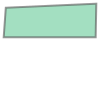

In [12]:
# Let’s create a Shapely Polygon repsenting the Helsinki Senate square that we can insert to our GeoDataFrame:

# Coordinates of the Helsinki Senate square in Decimal Degrees
coordinates = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

# Let's see what we have
poly

In [13]:
# Insert the polygon into 'geometry' -column at index 0
newdata.loc[0, 'geometry'] = poly

# Let's see what we have now
newdata


,geometry
0,"POLYGON ((24.9509 60.16916, 24.95349 60.16916,..."


In [15]:
#Let’s add another column to our GeoDataFrame called 
# Location with text Senaatintori.
# Add a new column and insert data
newdata.loc[0, 'Location'] = 'Senaatintori'

# Let's check the data
newdata

,geometry,Location
0,"POLYGON ((24.9509 60.16916, 24.95349 60.16916,...",Senaatintori


In [16]:
print(newdata.crs)

None


Let’s add a crs for our GeoDataFrame. 
A Python module called fiona has a nice function called from_epsg() for passing coordinate system for the GeoDataFrame. 

In [17]:
# Import specific function 'from_epsg' from fiona module
from fiona.crs import from_epsg

# Set the GeoDataFrame's coordinate system to WGS84
newdata.crs = from_epsg(4326)

# Let's see how the crs definition looks like
newdata.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Finally, we can export the data using GeoDataFrames .to_file() -function. 

In [21]:
# Determine the output path for the Shapefile
outfp = "Senaatintori.shp"

# Write the data into that Shapefile
newdata.to_file(outfp)

## Map projections
Coordinate reference systems (CRS) are important because the geometric shapes in a GeoDataFrame are simply a collection of coordinates in an arbitrary space. A CRS tells Python how those coordinates related to places on the Earth.

In [26]:
fp2 = 'Europe_borders.shp'
data = gpd.read_file(fp2)


DataSourceError: Unable to open Europe_borders.shx or Europe_borders.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.